In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

In [8]:
# Load the trial results CSV file
df = pd.read_csv('trial results.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset shape: (820, 14)

Columns: ['benchmark', 'implementation', 'file_path', 'run_number', 'file_exists', 'success', 'execution_time', 'return_code', 'command', 'stdout', 'stderr', 'timestamp', 'Unnamed: 12', 'Correctness']

First few rows:


,benchmark,implementation,file_path,run_number,file_exists,success,execution_time,return_code,command,stdout,stderr,timestamp,Unnamed: 12,Correctness
0,expert_answer,lmql,../benchmarks/expert_answer/expert_answer_lmql.py,1,True,True,4.754799,0,python ../benchmarks/expert_answer/expert_answ...,a computer scientist or linguist who specializ...,NaN,2025-06-29T10:22:40.390890,NaN,True
1,expert_answer,lmql,../benchmarks/expert_answer/expert_answer_lmql.py,2,True,True,4.321900,0,python ../benchmarks/expert_answer/expert_answ...,a computer scientist or linguist who specializ...,NaN,2025-06-29T10:22:40.390981,NaN,True
2,expert_answer,lmql,../benchmarks/expert_answer/expert_answer_lmql.py,3,True,True,2.606441,0,python ../benchmarks/expert_answer/expert_answ...,a computer scientist or linguist who specializ...,NaN,2025-06-29T10:22:40.391031,NaN,True
3,expert_answer,lmql,../benchmarks/expert_answer/expert_answer_lmql.py,4,True,True,3.113074,0,python ../benchmarks/expert_answer/expert_answ...,a computer scientist or linguist who specializ...,NaN,2025-06-29T10:22:40.391072,NaN,True
4,expert_answer,lmql,../benchmarks/expert_answer/expert_answer_lmql.py,5,True,True,2.404587,0,python ../benchmarks/expert_answer/expert_answ...,a computer scientist or linguist who specializ...,NaN,2025-06-29T10:22:40.391110,NaN,True


In [9]:
# Check unique benchmarks and implementations
print("Unique benchmarks:")
print(df['benchmark'].unique())
print(f"\nNumber of unique benchmarks: {df['benchmark'].nunique()}")

print("\nUnique implementations:")
print(df['implementation'].unique())
print(f"\nNumber of unique implementations: {df['implementation'].nunique()}")

# Check the distribution of runs per benchmark and implementation
print("\nData distribution:")
distribution = df.groupby(['benchmark', 'implementation']).size().reset_index(name='count')
print(distribution)

Unique benchmarks:
['expert_answer' 'joke_gen' 'essay_reviewer' 'text_to_type' 'math_problem'
 'translation' 'taskman' 'template' 'odd_word_out' 'mcq_reason'
 'wikipedia' 'rpg_level_gen' 'personality_finder']

Number of unique benchmarks: 13

Unique implementations:
['lmql' 'dspy' 'mtllm']

Number of unique implementations: 3

Data distribution:
             benchmark implementation  count
0       essay_reviewer           dspy     20
1       essay_reviewer           lmql     20
2       essay_reviewer          mtllm     20
3        expert_answer           dspy     20
4        expert_answer           lmql     20
5        expert_answer          mtllm     20
6             joke_gen           dspy     20
7             joke_gen           lmql     20
8             joke_gen          mtllm     20
9         math_problem           dspy     20
10        math_problem           lmql     20
11        math_problem          mtllm     20
12          mcq_reason           dspy     20
13          mcq_reason

In [10]:
# First, let's check for any null values in Correctness column
print("Null values in Correctness column:", df['Correctness'].isnull().sum())
print("Unique values in Correctness column:", df['Correctness'].unique())

# Filter out rows with null Correctness values
df_clean = df.dropna(subset=['Correctness']).copy()

# Calculate accuracy for each benchmark-implementation combination
accuracy_data = df_clean.groupby(['benchmark', 'implementation']).agg({
    'Correctness': ['count', 'sum']  # Using boolean column directly
}).round(3)

# Flatten column names
accuracy_data.columns = ['total_runs', 'correct_runs']

# Calculate accuracy
accuracy_data['accuracy'] = (accuracy_data['correct_runs'] / accuracy_data['total_runs'] * 100).round(2)

# Reset index to make it easier to work with
accuracy_df = accuracy_data.reset_index()

print("\nAccuracy summary:")
print(accuracy_df)

# Pivot the data for plotting
accuracy_pivot = accuracy_df.pivot(index='benchmark', columns='implementation', values='accuracy')
print(f"\nAccuracy matrix:\n{accuracy_pivot}")

Null values in Correctness column: 0
Unique values in Correctness column: [ True False]

Accuracy summary:
             benchmark implementation  total_runs  correct_runs  accuracy
0       essay_reviewer           dspy          20            20     100.0
1       essay_reviewer           lmql          20             0       0.0
2       essay_reviewer          mtllm          20            20     100.0
3        expert_answer           dspy          20            20     100.0
4        expert_answer           lmql          20            20     100.0
5        expert_answer          mtllm          20            20     100.0
6             joke_gen           dspy          20            20     100.0
7             joke_gen           lmql          20            20     100.0
8             joke_gen          mtllm          20            20     100.0
9         math_problem           dspy          20            20     100.0
10        math_problem           lmql          20            20     100.0
11   

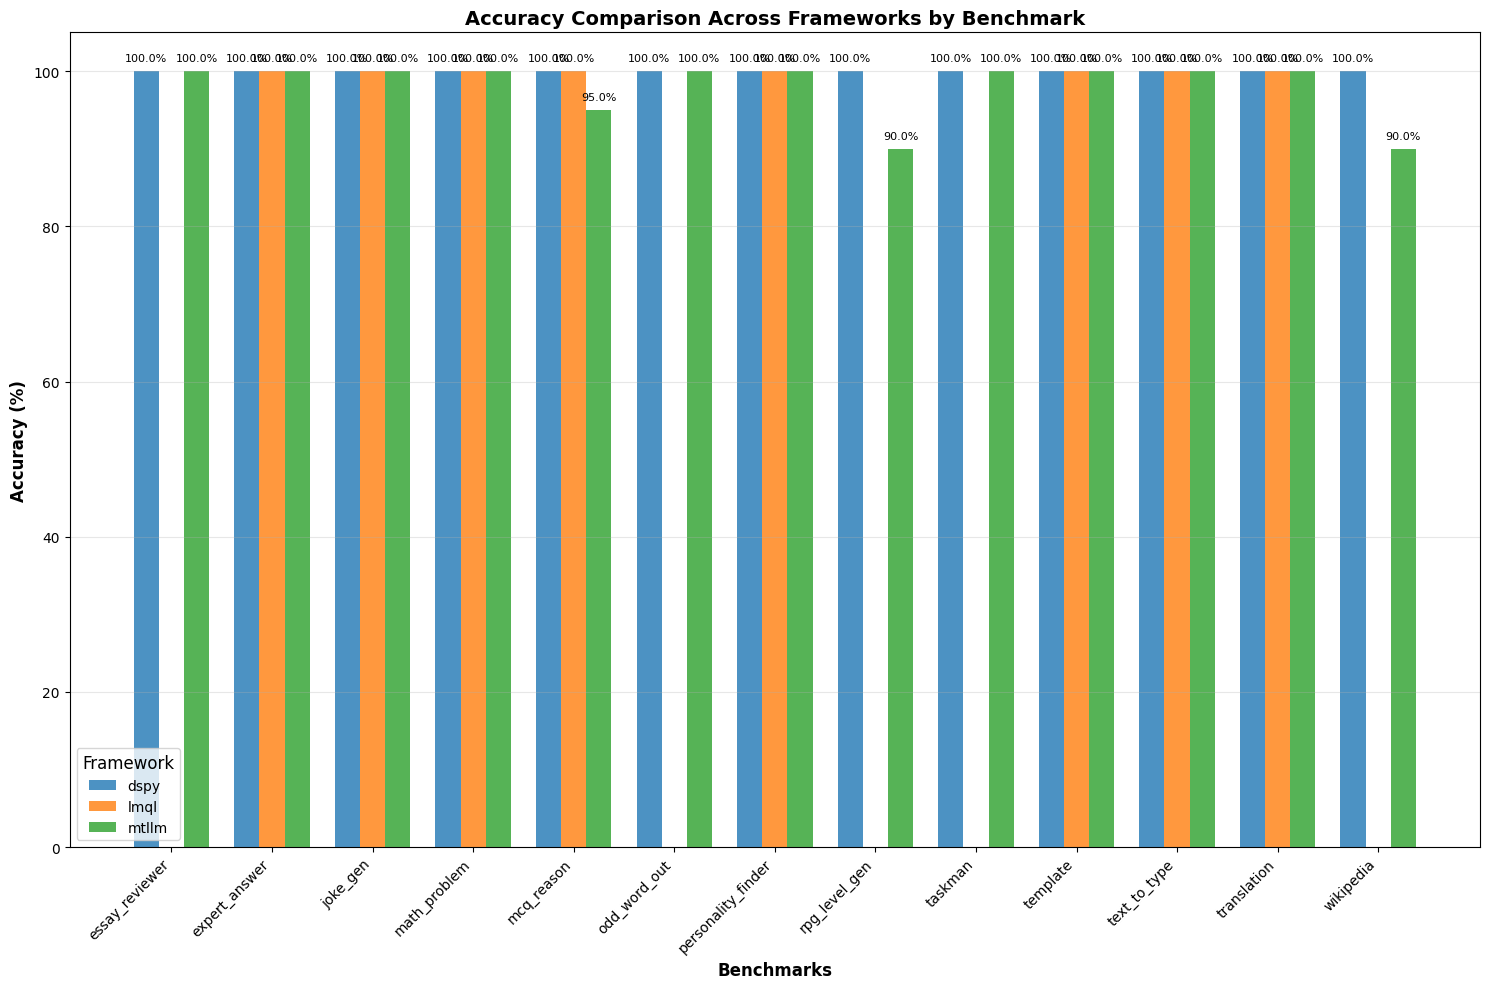


Summary Statistics:
Number of benchmarks: 13
Frameworks compared: dspy, lmql, mtllm

Mean accuracy by framework:
  dspy: 100.00%
  lmql: 66.67%
  mtllm: 98.08%


In [11]:
# Create accuracy plot for each benchmark across the three frameworks
plt.figure(figsize=(15, 10))

# Create a grouped bar plot
x = np.arange(len(accuracy_pivot.index))  # benchmark positions
width = 0.25  # width of the bars

# Get the three implementations
implementations = accuracy_pivot.columns.tolist()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Create bars for each implementation
for i, impl in enumerate(implementations):
    values = accuracy_pivot[impl].fillna(0)  # Fill NaN with 0 for missing combinations
    plt.bar(x + i * width, values, width, label=impl, color=colors[i], alpha=0.8)
    
    # Add value labels on top of bars
    for j, v in enumerate(values):
        if not np.isnan(v) and v > 0:
            plt.text(x[j] + i * width, v + 1, f'{v:.1f}%', 
                    ha='center', va='bottom', fontsize=8)

# Customize the plot
plt.xlabel('Benchmarks', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Accuracy Comparison Across Frameworks by Benchmark', fontsize=14, fontweight='bold')
plt.xticks(x + width, accuracy_pivot.index, rotation=45, ha='right')
plt.legend(title='Framework', title_fontsize=12)
plt.ylim(0, 105)  # Set y-axis limit to show percentages clearly
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

print(f"\nSummary Statistics:")
print(f"Number of benchmarks: {len(accuracy_pivot.index)}")
print(f"Frameworks compared: {', '.join(implementations)}")
print(f"\nMean accuracy by framework:")
for impl in implementations:
    mean_acc = accuracy_pivot[impl].mean()
    print(f"  {impl}: {mean_acc:.2f}%")

In [12]:
# Create a detailed summary table
print("Detailed Accuracy Table:")
print("="*60)
accuracy_table = accuracy_pivot.fillna(0).round(1)
print(accuracy_table.to_string())

print(f"\n\nFramework Performance Summary:")
print("="*40)
for framework in accuracy_pivot.columns:
    values = accuracy_pivot[framework].dropna()
    print(f"{framework.upper()}:")
    print(f"  Mean accuracy: {values.mean():.1f}%")
    print(f"  Min accuracy: {values.min():.1f}%")
    print(f"  Max accuracy: {values.max():.1f}%")
    print(f"  Benchmarks evaluated: {len(values)}")
    print()

# Count benchmarks where each framework achieved 100% accuracy
print("Benchmarks with 100% accuracy by framework:")
for framework in accuracy_pivot.columns:
    perfect_scores = (accuracy_pivot[framework] == 100).sum()
    total_benchmarks = accuracy_pivot[framework].notna().sum()
    print(f"  {framework}: {perfect_scores}/{total_benchmarks} benchmarks")

Detailed Accuracy Table:
implementation       dspy   lmql  mtllm
benchmark                              
essay_reviewer      100.0    0.0  100.0
expert_answer       100.0  100.0  100.0
joke_gen            100.0  100.0  100.0
math_problem        100.0  100.0  100.0
mcq_reason          100.0  100.0   95.0
odd_word_out        100.0    0.0  100.0
personality_finder  100.0  100.0  100.0
rpg_level_gen       100.0    0.0   90.0
taskman             100.0    0.0  100.0
template            100.0  100.0  100.0
text_to_type        100.0  100.0  100.0
translation         100.0  100.0  100.0
wikipedia           100.0    0.0   90.0


Framework Performance Summary:
DSPY:
  Mean accuracy: 100.0%
  Min accuracy: 100.0%
  Max accuracy: 100.0%
  Benchmarks evaluated: 13

LMQL:
  Mean accuracy: 66.7%
  Min accuracy: 0.0%
  Max accuracy: 100.0%
  Benchmarks evaluated: 12

MTLLM:
  Mean accuracy: 98.1%
  Min accuracy: 90.0%
  Max accuracy: 100.0%
  Benchmarks evaluated: 13

Benchmarks with 100% accuracy by f